In [219]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your custom model
model_path = "C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/SavedNetworks/ART_ResNet_save_at_28_2.keras"
model = tf.keras.models.load_model(model_path)


In [202]:
print(tf.__version__)

2.16.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.52156925]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


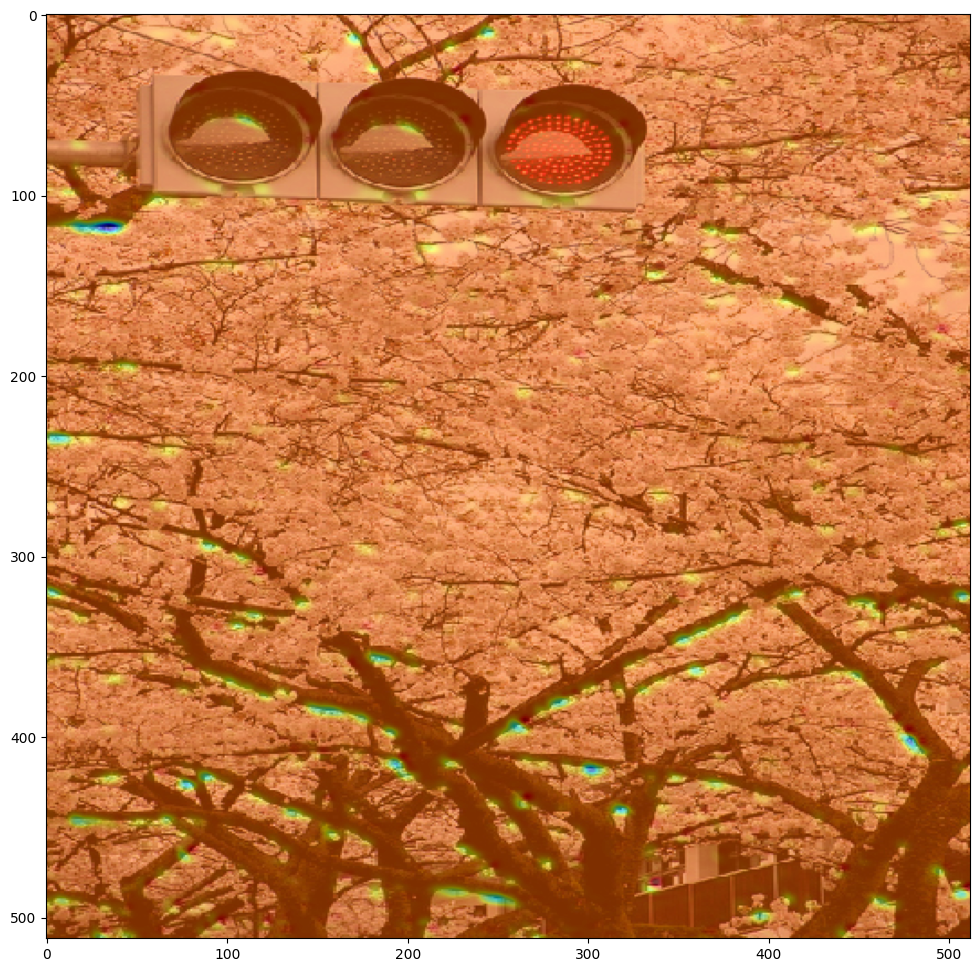

In [213]:
from scipy.ndimage import zoom
img_path = "C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/test_dataset/REAL/real_nature4.jpg"
model_path = "C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/SavedNetworks/ART_ResNet_save_at_28_2.keras"
layer_name = 'conv2d_24'
dense_layer = 'dense_1'

def do_heatmap(img_path,model_path,layer_name):
    model = tf.keras.models.load_model(model_path)
    model.build(input_shape=(None, 512, 512, 3))
    dummy_input = np.random.random((1, 512, 512, 3)).astype(np.float32)
    _ = model.predict(dummy_input)
    
    img = image.load_img(img_path, target_size=(512, 512))  # Adjust target_size as per your model input
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Assuming your model expects inputs in the range [0, 1]

    print(model.predict(x))

  # Change this to the correct name of the layer you want to visualize
    last_conv_layer = model.get_layer(layer_name).output
    pred_layer = model.get_layer(dense_layer).output
    intermediate_layer_model = tf.keras.models.Model(model.inputs, outputs=[last_conv_layer, pred_layer])
    conv,pred = intermediate_layer_model.predict(x)

    target = np.argmax(pred, axis=1).squeeze()
    w, b = intermediate_layer_model.get_layer(dense_layer).weights
    weight = w[:, target].numpy()

    heatmap = conv.squeeze(axis=0) 
    heatmap_2d = np.mean(heatmap, axis=-1)  

    scale_x = 512 / heatmap_2d.shape[1]
    scale_y = 512 / heatmap_2d.shape[0]
    zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

    plt.figure(figsize = (12,12))
    plt.imshow(img)
    plt.imshow(zoom(heatmap_2d, zoom = zoom_tuple), cmap='jet',alpha= 0.5)

do_heatmap(img_path,model_path,layer_name)

In [176]:
# Load and preprocess the image
img_path = "C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/test_dataset/FAKE/ai_animal.png"
img = image.load_img(img_path, target_size=(512, 512))  # Adjust target_size as per your model input
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Assuming your model expects inputs in the range [0, 1]

In [44]:
print(x.shape)

(1, 512, 512, 3)


In [220]:
# Ensure the model is built
model.build(input_shape=(None, 512, 512, 3))
dummy_input = np.random.random((1, 512, 512, 3)).astype(np.float32)
_ = model.predict(dummy_input)
model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 512, 512,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        128 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 512, 512,  │     18,496 │ activation_9[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 512, 512,  │      2,112 │ activation_9[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 512, 512,  │     36,928 │ activation_10[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 512, 512,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 512, 512,  │          0 │ add_4[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 256, 256,  │          0 │ activation_11[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 256, 256,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 256, 256,  │          0 │ batch_normalizat

 Total params: 14,658,885 (55.92 MB)

 Trainable params: 4,884,353 (18.63 MB)

 Non-trainable params: 5,824 (22.75 KB)

 Optimizer params: 9,768,708 (37.26 MB)

In [177]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[0.9968458]]


In [164]:

# Get the layer and create the intermediate model
layer_name = 'conv2d_2'  # Change this to the correct name of the layer you want to visualize
last_conv_layer = model.get_layer(layer_name).output
pred_layer = model.get_layer('dense_1').output


In [178]:

intermediate_layer_model = tf.keras.models.Model(model.inputs, outputs=[last_conv_layer, pred_layer])
conv,pred = intermediate_layer_model.predict(x)

#Plot the heatmap of the activations


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


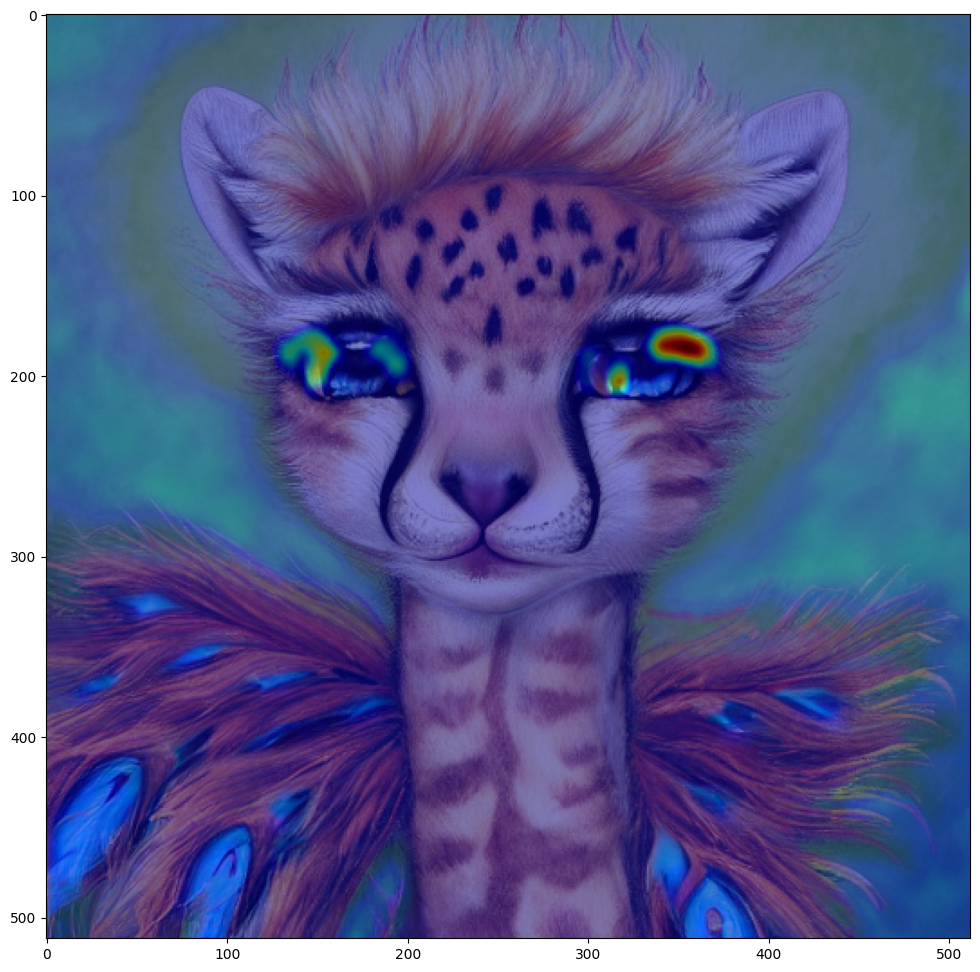

In [179]:
from scipy.ndimage import zoom

target = np.argmax(pred, axis=1).squeeze()
w, b = intermediate_layer_model.get_layer('dense').weights
weight = w[:, target].numpy()

heatmap = conv.squeeze(axis=0) 


heatmap_2d = np.mean(heatmap, axis=-1)  

scale_x = 512 / heatmap_2d.shape[1]
scale_y = 512 / heatmap_2d.shape[0]
zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

plt.figure(figsize = (12,12))
plt.imshow(img)
plt.imshow(zoom(heatmap_2d, zoom = zoom_tuple), cmap='jet',alpha= 0.5)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Heatmap shape: (60, 60)
Heatmap values range: 0.0 2.083558


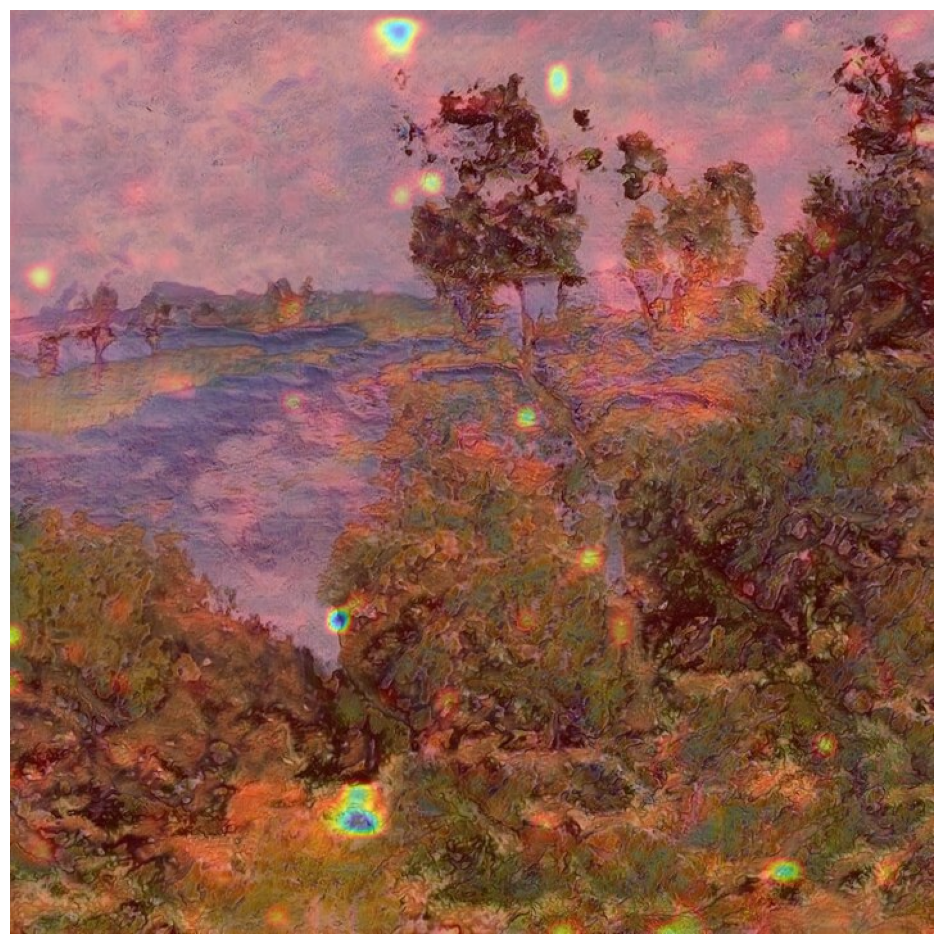

In [77]:
pred = model.predict(x)
target = np.argmax(pred, axis=1).squeeze()

# Get the weights of the final dense layer
dense_layer_weights, dense_layer_bias = model.get_layer('dense').get_weights()
weight = dense_layer_weights[:, target]

# Compute the heatmap
heatmap = conv.squeeze(axis=0)
heatmap_2d = np.mean(heatmap, axis=-1)

# Verify the heatmap values
print("Heatmap shape:", heatmap_2d.shape)
print("Heatmap values range:", np.min(heatmap_2d), np.max(heatmap_2d))

# Get the dimensions of the original image
original_img = image.load_img(img_path)
original_img_array = image.img_to_array(original_img)

# Calculate the scaling factors
scale_x = original_img_array.shape[1] / heatmap_2d.shape[1]
scale_y = original_img_array.shape[0] / heatmap_2d.shape[0]
zoom_tuple = (scale_y, scale_x)  # Zoom for 2D array

# Resize the heatmap
resized_heatmap = zoom(heatmap_2d, zoom=zoom_tuple)

# Normalize the resized heatmap
resized_heatmap = np.maximum(resized_heatmap, 0)
resized_heatmap /= np.max(resized_heatmap)

# Load the original image with OpenCV
import cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply the heatmap on the image
heatmap = cv2.applyColorMap(np.uint8(255 * resized_heatmap), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# Display the image with heatmap
plt.figure(figsize=(12, 12))
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()
